In this example, we are going to use neural networks to classify images into one of the ten clothing
categories, 'T-shirt', 'Pants', ' Sweater ', ' Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', ' Bag ', and
'Boot'. To do this, we will use the data from a free access data set called MNIST.

In [24]:
# Use an nn to classify images into one of ten categories
# tshirts, pants, sweater, dress, coat, sandal, shirt, sneaker, bag, boot
# use data from free dataset MNIST

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras


Load the data from the data set and obtain the data that will be used for the training and testing
phases.

In [25]:
#load data from MNIST fashion dataset
fashion_mnist = keras.datasets.fashion_mnist


In [26]:
#Training Set:  train_images, train_labels.
#test set:  test_images, test_labels
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Define the ten categories that we want to use to classify the given clothing images.

In [27]:
#define 10 categories to classify the images
class_names = ['T-shirt', 'Pants', 'Sweater', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Boot']

Visualize the type of input data that will be used for the neural network.

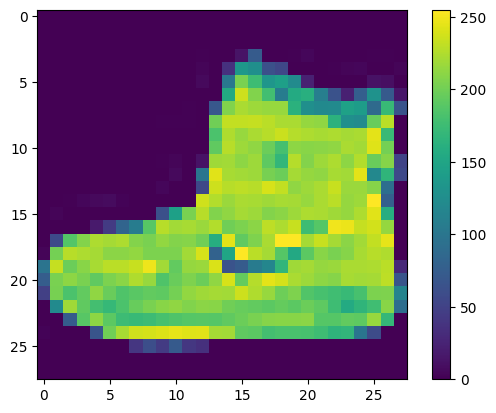

In [28]:
# Visualize type of input data to be used for the nn
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Preprocess the data, scaling it to a range between 0 and 1, and then visualize the first 25 data.

In [29]:
# Preprocess data. Scale to range between 0 and 1
# visualize the first 25 data

train_images = train_images / 255.0
test_images = test_images / 255.0

With the data in the correct format, we are now ready to build and train the NN.  The first 25 preprocessed images are shown below from the Training Set

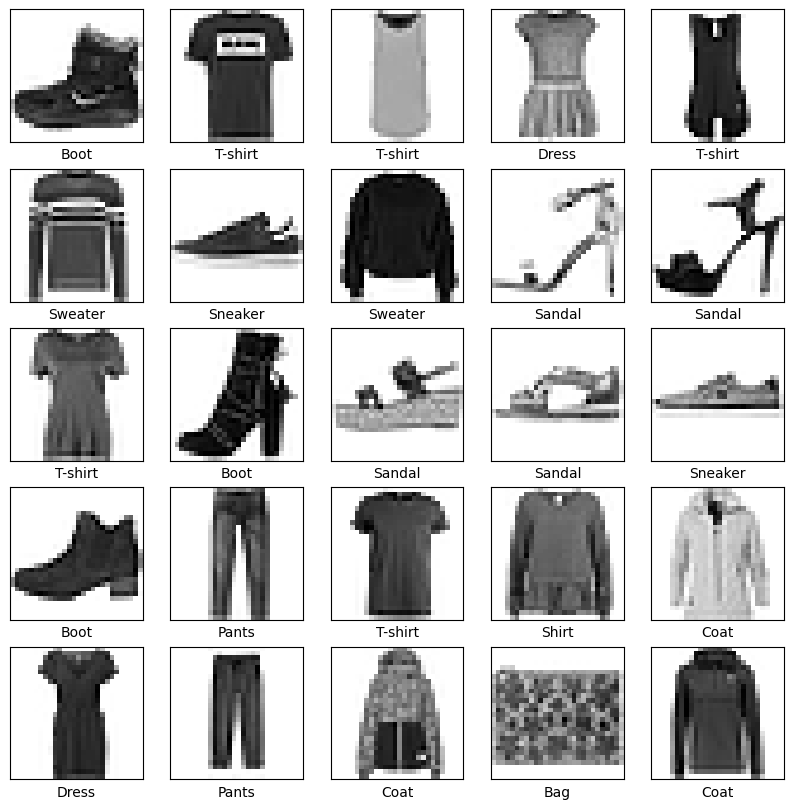

In [30]:
#Show first 25 preprocessed images below from training set
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names [train_labels[i]])

Define the neural network model with three layers: the input layer with 784 neurons corresponding
to the 28 * 28 pixels of the input image with which our network will be fed, as well as a hidden
layer with 128 neurons and an output layer with 10 neurons corresponding to our previously
defined categories.

In [31]:
# Build the model.
# Sequential NN
# 1.  Input layer w 784 neurons (28x28)
# 2.  Hidden layer w 128 neurons.
# 3.  Output layer w 10 neurons for 10 categories

model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(128, activation = tf.nn.relu),
    keras.layers.Dense(10, activation = tf.nn.softmax)
    ])

Adjust the model and train the neural network with the training data.

In [32]:
# Compile model
model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

#Train Model
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 0.5012 - accuracy: 0.8231
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3760 - accuracy: 0.8646
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3385 - accuracy: 0.8761
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3122 - accuracy: 0.8857
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2950 - accuracy: 0.8910


Evaluate the accuracy.

In [33]:
# Evaluate accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Precision Evaluation:', test_acc)


313/313 [==============================] - 1s 2ms/step - loss: 0.3560 - accuracy: 0.8722
Precision Evaluation: 0.8722000122070312


Make predictions.

In [34]:

#Make predictions
#For one image:

#test image from test set
img = test_images[5]

#add image to a batch with a single member
img = (np.expand_dims(img, 0))

#perform prediction on the image
prediction = model.predict(img)

1/1 [==============================] - 0s 84ms/step


Visualize the results.

1. Define visualization functions.

In [35]:
def plot_image(i, predictions_array, true_label, img):

    predictions_array = predictions_array[i]
    true_label = true_label[i]
    img = img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap = plt.cm.binary)

    predicted_label = np.argmax(predictions_array)

    if predicted_label == true_label:
        color='blue'
    else:
        color='red'

    plt.xlabel('{} {:2.0f}% ({})'.format(class_names[predicted_label], 100*np.max(predictions_array), class_names[true_label]),color = color)




def plot_value_array(i, predictions_array, true_label):

    predictions_array = predictions_array[i]
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color='#777777')
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

In [36]:
#visualize results

num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))


<Figure size 1200x1000 with 0 Axes>

<Figure size 1200x1000 with 0 Axes>

Represent each prediction graphically.

In [ ]:
#Represent the prediction graphically
plot_image(0, prediction, test_labels, img)

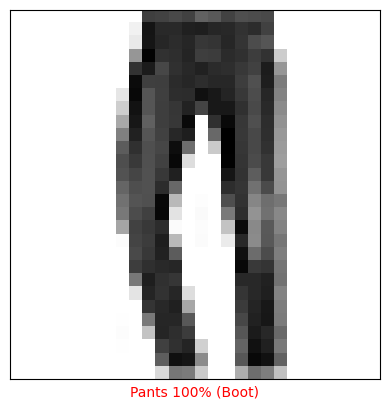

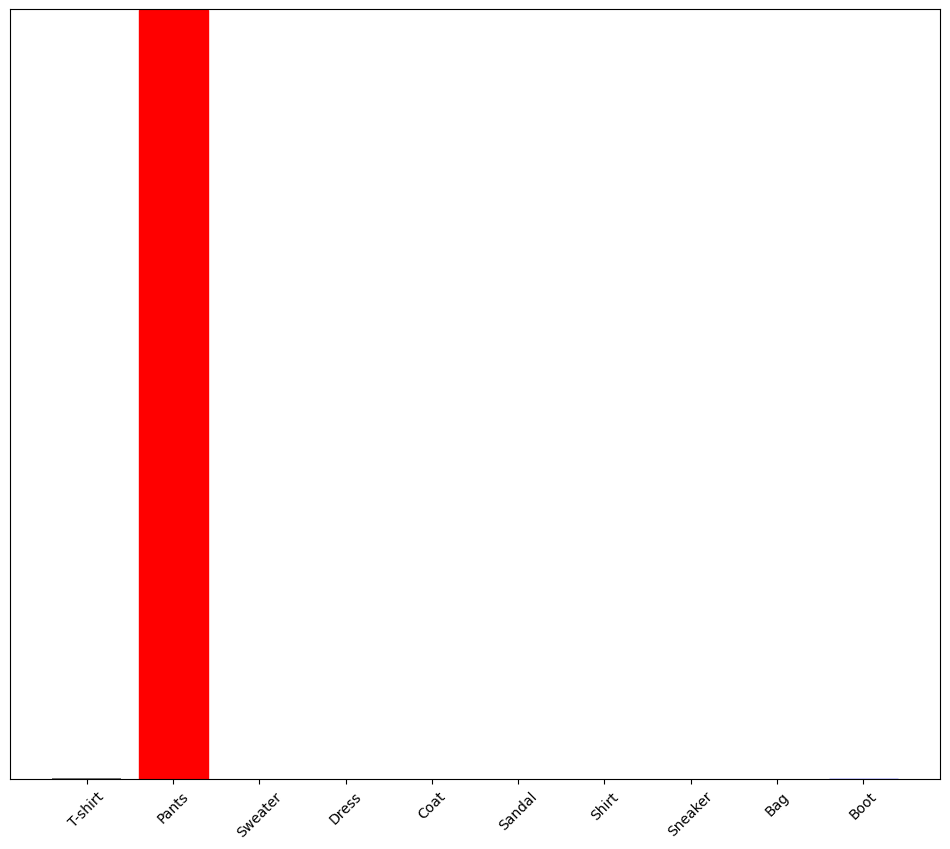

In [37]:
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
plot_value_array(0,prediction, test_labels)
_ = plt.xticks(range(10),class_names,rotation=45)
